In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm import tqdm
import cv2
from PIL import Image
import os

In [3]:
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
import cv2
import matplotlib as plt
from matplotlib import image
from PIL import Image
import os
names = {}
def load_imgs(path):
    imgs = []
    label = []
    l1 = os.listdir(path)
    category = 0
    for i in l1:
        if i!='test.csv':
            names[category] = i
            l2 = os.listdir(path+'/'+i)
            for j in l2:
                img = Image.open(path+i+'/'+j).convert('RGB')
                img = img.resize(size=(32,32))
                #img = img.convert('L')
                imgs.append(np.array(img))
                label.append(i)
                del img
            category += 1
    return np.array(imgs),label

In [4]:
train_x, train_y = load_imgs('/kaggle/input/multiclass-weather-dataset/dataset/')

In [5]:
names

{0: 'cloudy',
 1: 'sunrise',
 2: 'alien_test',
 3: 'shine',
 4: 'foggy',
 5: 'rainy'}

In [6]:
train_y = pd.factorize(np.array(train_y))[0]
train_x.shape, train_y.shape

((1530, 32, 32, 3), (1530,))

In [7]:
np.unique(train_y)

array([0, 1, 2, 3, 4, 5])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size=0.25,random_state=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1147, 32, 32, 3), (1147,), (383, 32, 32, 3), (383,))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense
from tensorflow.keras.layers import MaxPool2D
#defining model
model = Sequential()
#adding Convolution layer
model.add(Conv2D(32,activation='relu',kernel_size=3,input_shape=x_train.shape[1:]))
#adding pooling layer
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,activation='relu',kernel_size=3))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,activation='relu',kernel_size=3))
model.add(MaxPool2D(2,2))
model.add(Flatten())
#adding fully connected layer
model.add(Dense(1000,activation='relu'))
#adding output layer
model.add(Dense(6,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

2022-12-01 18:30:38.353440: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
model.fit(x_train,y_train,epochs=30)

2022-12-01 18:30:38.616335: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
36/36 [==============================] - 2s 25ms/step - loss: 6.9020 - accuracy: 0.4743
Epoch 2/30
36/36 [==============================] - 1s 25ms/step - loss: 0.9614 - accuracy: 0.6408
Epoch 3/30
36/36 [==============================] - 1s 26ms/step - loss: 0.7778 - accuracy: 0.7140
Epoch 4/30
36/36 [==============================] - 1s 25ms/step - loss: 0.6759 - accuracy: 0.7629
Epoch 5/30
36/36 [==============================] - 1s 24ms/step - loss: 0.6175 - accuracy: 0.7716
Epoch 6/30
36/36 [==============================] - 1s 24ms/step - loss: 0.5591 - accuracy: 0.7969
Epoch 7/30
36/36 [==============================] - 1s 23ms/step - loss: 0.4932 - accuracy: 0.8265
Epoch 8/30
36/36 [==============================] - 1s 24ms/step - loss: 0.3697 - accuracy: 0.8779
Epoch 9/30
36/36 [==============================] - 1s 24ms/step - loss: 0.3190 - accuracy: 0.8936
Epoch 10/30
36/36 [==============================] - 1s 24ms/step - loss: 0.2746 - accuracy: 0.8945
Epoch 11/

In [12]:
_,acc = model.evaluate(x_test,y_test)
acc*100

12/12 [==============================] - 0s 9ms/step - loss: 1.3730 - accuracy: 0.7990


79.89556193351746

'cloudy'

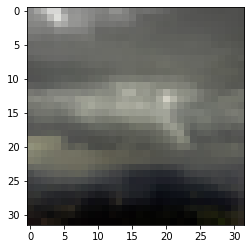

In [13]:
res = model.predict(x_test[:1])
ind = np.argmax(res)
plt.pyplot.imshow(x_test[0])
names[ind]

'sunrise'

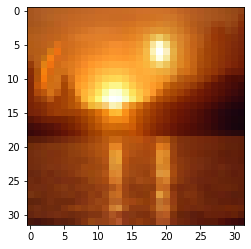

In [14]:
res = model.predict(x_test[200:201])
ind = np.argmax(res)
plt.pyplot.imshow(x_test[200])
names[ind]